In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SequentialFeatureSelector

In [20]:
df=pd.read_csv('/Users/parmikenia/Desktop/internship codes/validation dataset2.csv')

In [21]:
X = df.drop(columns=['Customer_ID','Credit_Score'])
y = df['Credit_Score']

In [ ]:
# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Step 1: Initialize the XGBoost model
model = XGBRegressor(random_state=42)

In [23]:
# Step 2: Initialize RFE with the model and choose the number of features to select (e.g., 5)
rfe = RFE(model, n_features_to_select=15)

# Step 3: Fit RFE on the data
rfe.fit(X, y)

# Step 4: Get the selected features
X_rfe = rfe.transform(X)

In [24]:
# Step 5: Train the linear model on the selected features
model.fit(X_rfe, y)

# Step 6: Make predictions
y_pred = model.predict(X_rfe)

In [25]:
# Step 7: Calculate MSE, RMSE, and MAE
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

# Output the results
print("Selected Features:", rfe.support_)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Selected Features: [ True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True False False False False]
Mean Squared Error (MSE): 3.508662529985671e-07
Root Mean Squared Error (RMSE): 0.0005923396432778808
Mean Absolute Error (MAE): 0.00037854199594143195


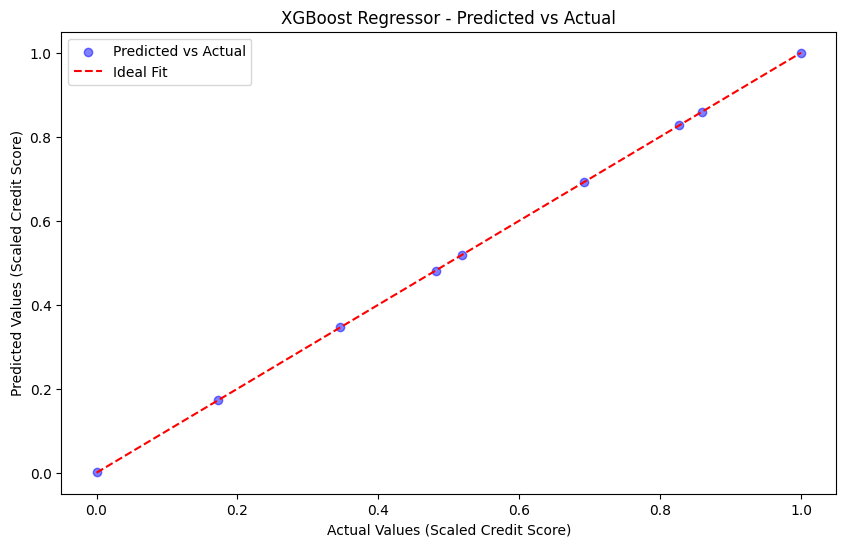

In [26]:
# Plot Regression Line (Actual vs. Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color="blue", alpha=0.5, label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Values (Scaled Credit Score)")
plt.ylabel("Predicted Values (Scaled Credit Score)")
plt.title("XGBoost Regressor - Predicted vs Actual")
plt.legend()
plt.show()